**Name: Sparsh Saxena** <BR>
**Registration No.: 21BCE6015** <BR>
**Slot: L57+L58** <BR>
**Lab 10 Assignment** <BR>
**Machine Learning Lab** <BR>
**Submitted to: Ms. R.Jothi** <br>
**Collab Link: https://colab.research.google.com/drive/1sw023u5TTCol0EFZ3kMdAtOyfek0PxZr#scrollTo=JR4omSOHhr-B**

#**Question**


Consider Differentiated Thyroid Cancer Recurrence dataset which contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years. Apply the following ensemble approaches and compare their performances. Plot confusion matrix for all the algorithms. <br>

**a.	Random Forest** <br>
**b.	Adaboost** <br>
**c.	XGBoost** <br>

#**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score,ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

#**Reading and Correcting the dataset**

In [ ]:
# Read the dataset

df = pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
# Checking for null values and type of values in columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
# Only one numerical column 'Age', that can be inferred from this

df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


#**EDA (Exploratory Data Analysis)**

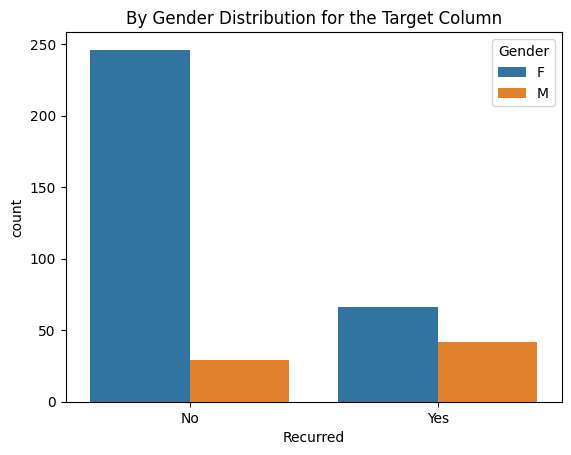

In [ ]:
sns.countplot(x = 'Recurred',data=df,hue='Gender')
plt.title("By Gender Distribution for the Target Column")
plt.show()

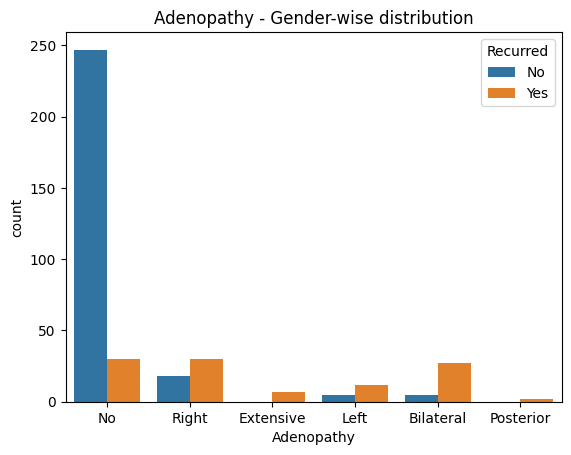

In [ ]:
sns.countplot(x = 'Adenopathy',data = df,hue = 'Recurred')
plt.title("Adenopathy - Gender-wise distribution")
plt.show()

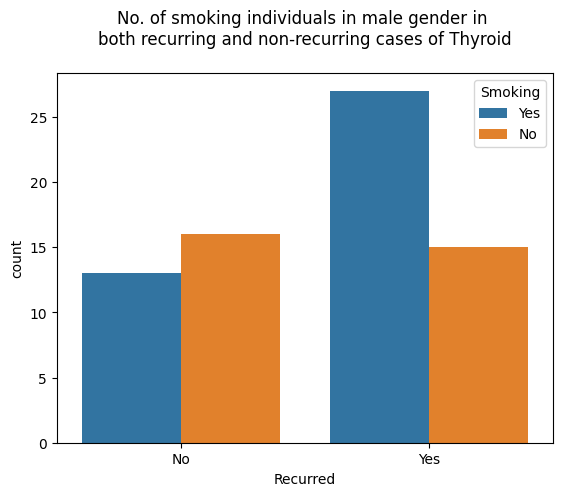

In [ ]:
sns.countplot(x = 'Recurred',data = df.loc[df['Gender']=='M'],hue='Smoking')
plt.title("No. of smoking individuals in male gender in \nboth recurring and non-recurring cases of Thyroid\n")
plt.show()

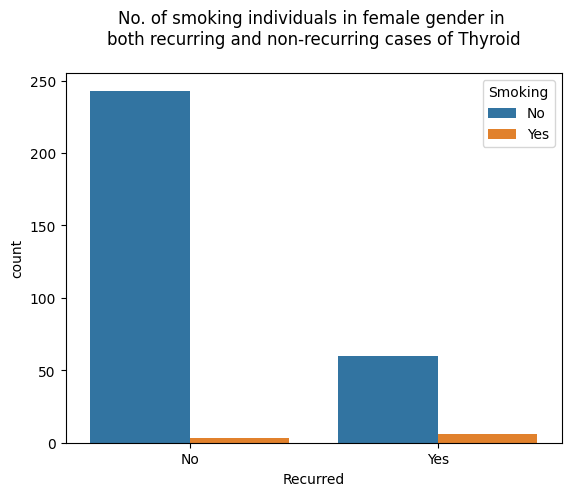

In [ ]:
sns.countplot(x = 'Recurred',data = df.loc[df['Gender']=='F'],hue='Smoking')
plt.title("No. of smoking individuals in female gender in \nboth recurring and non-recurring cases of Thyroid\n")
plt.show()

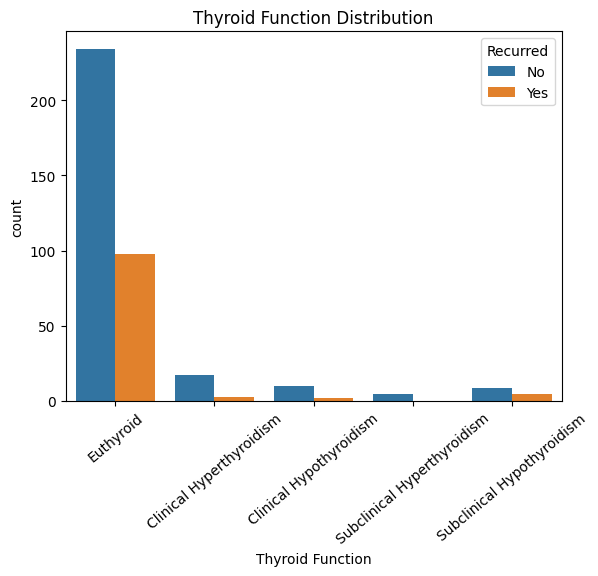

In [ ]:
sns.countplot(x = 'Thyroid Function' ,data = df,hue='Recurred')
plt.xticks(rotation = 40)
plt.title("Thyroid Function Distribution")
plt.show()

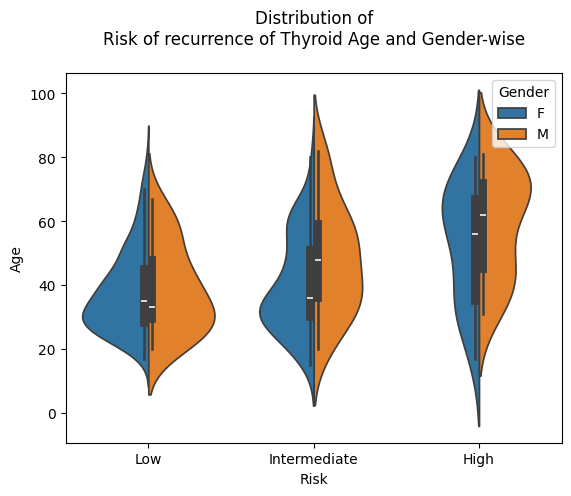

In [ ]:
sns.violinplot(x ='Risk', y ='Age', data = df, hue ='Gender', split = True)
plt.title("Distribution of\nRisk of recurrence of Thyroid Age and Gender-wise\n")
plt.show()

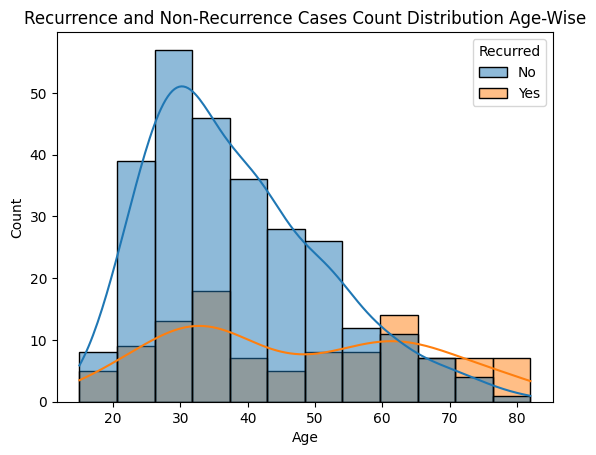

In [ ]:
sns.histplot(x = 'Age',hue='Recurred',data=df,kde=True)
plt.title("Recurrence and Non-Recurrence Cases Count Distribution Age-Wise")
plt.show()

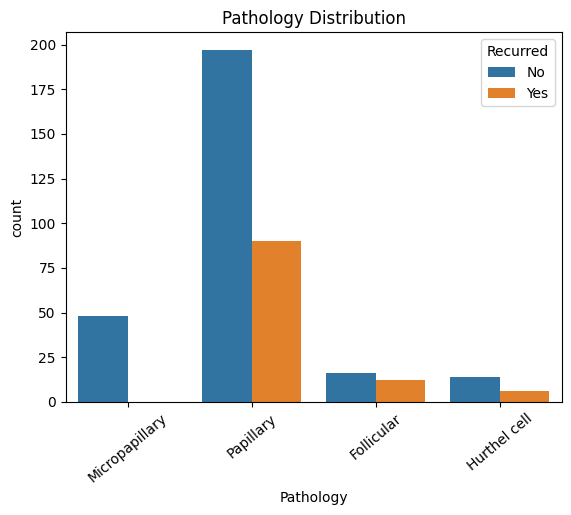

In [ ]:
sns.countplot(x = 'Pathology' ,data = df,hue='Recurred')
plt.xticks(rotation = 40)
plt.title("Pathology Distribution")
plt.show()

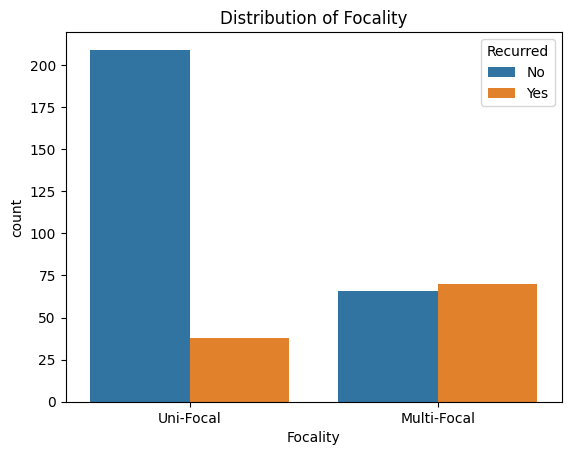

In [ ]:
sns.countplot(x= 'Focality', data= df,hue='Recurred')
plt.title("Distribution of Focality")
plt.show()

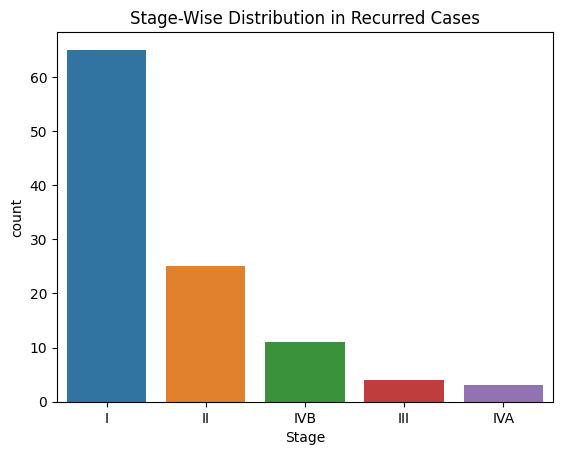

In [ ]:
sns.countplot(x = "Stage",data = df.loc[df["Recurred"] == "Yes"],hue = "Stage")
plt.title("Stage-Wise Distribution in Recurred Cases")
plt.show()

#**Data Preprocessing and Train-Test Split**

In [ ]:
# Scaling and Label Encoding

col_list = df.columns.tolist()
col_list.remove("Age")

label_enc = LabelEncoder()
scaler = MinMaxScaler()

for col in col_list:
  df[col] = label_enc.fit_transform(df[col])

df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,0.179104,0.0,0.0,0.0,0.0,0.5,0.75,0.6,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.0
1,0.283582,0.0,0.0,1.0,0.0,0.5,0.25,0.6,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.0
2,0.223881,0.0,0.0,0.0,0.0,0.5,1.00,0.6,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.0
3,0.701493,0.0,0.0,0.0,0.0,0.5,1.00,0.6,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.0
4,0.701493,0.0,0.0,0.0,0.0,0.5,0.25,0.6,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.0


In [ ]:
# Split between target and features

X = df.drop("Recurred",axis=1)
y = df["Recurred"]

In [ ]:
# Train and Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Evaluations**

**Random Forest Classification**

In [ ]:
# Model Fitting and Report for RF

random_forest_model = RandomForestClassifier(criterion = 'gini')
random_forest_model.fit(X_train,y_train)
preds_rf = random_forest_model.predict(X_test)
print("Classification Report for Random Forest Classifier \n\n")
print(classification_report(y_test,preds_rf))
print()
print(f"Accuracy : {round(accuracy_score(y_test,preds_rf)*100,2)} %")
print(f"F1-Score : {round(f1_score(y_test,preds_rf)*100,2)} %")

Classification Report for Random Forest Classifier 


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        58
         1.0       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77


Accuracy : 98.7 %
F1-Score : 97.3 %


<Figure size 800x600 with 0 Axes>

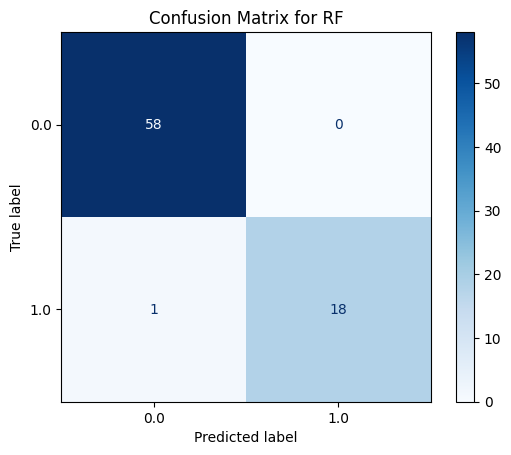

In [ ]:
# Confusion Matrix for RF

plt.figure(figsize = (8,6))
disp = ConfusionMatrixDisplay.from_estimator(
      random_forest_model,
      X_test,
      y_test,
      display_labels = df['Recurred'].unique(),
      cmap=plt.cm.Blues
)
plt.title("Confusion Matrix for RF")
plt.show()

**AdaBoost Model Classification**

In [ ]:
# Model Fitting and Report for AdaBoost

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train,y_train)
preds_ab = adaboost_model.predict(X_test)
print("Classification Report for AdaBoost Classifier \n\n")
print(classification_report(y_test,preds_ab))
print()
print(f"Accuracy : {round(accuracy_score(y_test,preds_ab)*100,2)} %")
print(f"F1-Score : {round(f1_score(y_test,preds_ab)*100,2)} %")

Classification Report for AdaBoost Classifier 


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        58
         1.0       0.90      0.95      0.92        19

    accuracy                           0.96        77
   macro avg       0.94      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77


Accuracy : 96.1 %
F1-Score : 92.31 %


<Figure size 800x600 with 0 Axes>

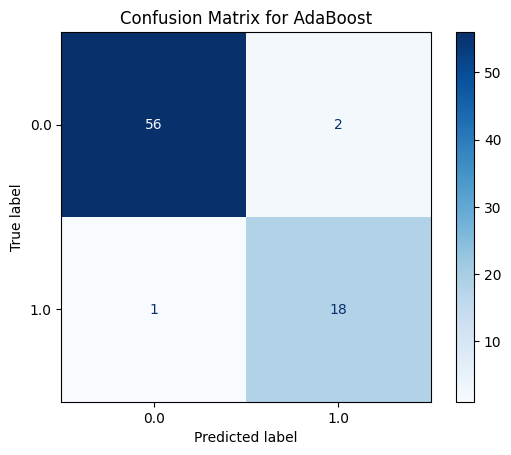

In [ ]:
# Confusion Matrix for AdaBoost

plt.figure(figsize = (8,6))
disp = ConfusionMatrixDisplay.from_estimator(
      adaboost_model,
      X_test,
      y_test,
      display_labels = df['Recurred'].unique(),
      cmap=plt.cm.Blues
)
plt.title("Confusion Matrix for AdaBoost")
plt.show()

**XGBoost Model Classification**

In [ ]:
# Model Fitting and Report for XGBoost

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train,y_train)
preds_xg = xgboost_model.predict(X_test)
print("Classification Report for XGBoost Classifier \n\n")
print(classification_report(y_test,preds_xg))
print()
print(f"Accuracy : {round(accuracy_score(y_test,preds_xg)*100,2)} %")
print(f"F1-Score : {round(f1_score(y_test,preds_xg)*100,2)} %")

Classification Report for XGBoost Classifier 


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        58
         1.0       0.90      0.95      0.92        19

    accuracy                           0.96        77
   macro avg       0.94      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77


Accuracy : 96.1 %
F1-Score : 92.31 %


<Figure size 800x600 with 0 Axes>

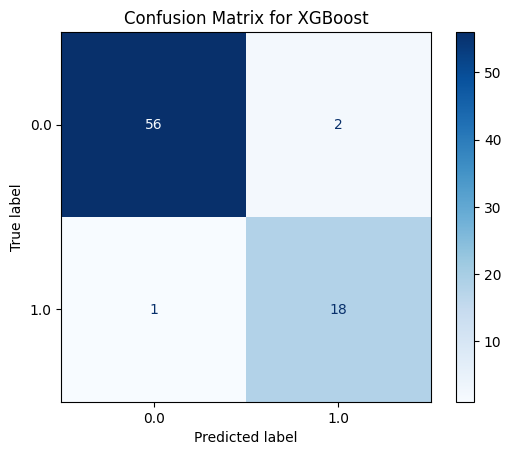

In [ ]:
# Confusion Matrix for XGBoost

plt.figure(figsize = (8,6))
disp = ConfusionMatrixDisplay.from_estimator(
      xgboost_model,
      X_test,
      y_test,
      display_labels = df['Recurred'].unique(),
      cmap=plt.cm.Blues
)
plt.title("Confusion Matrix for XGBoost")
plt.show()

**Out of the three models assigned to us for use, Random Forest Classifier showed the best performance with 98.7 % accuracy and 97.3 % F1-Score with only  1 False-Positive and 0 False-Negative classified values out of total values in the test set. Other two models have exactly identical performance on the dataset.**